In [41]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras import models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [42]:
(x_train, _), (x_test, _) = mnist.load_data()

In [43]:
x_train.shape

(60000, 28, 28)

In [44]:
x_train_scaled = x_train.astype('float32') / 255.
x_test_scaled = x_test.astype('float32') / 255.
x_train_scaled = np.reshape(x_train_scaled, (len(x_train_scaled), 28, 28, 1))
x_test_scaled = np.reshape(x_test_scaled, (len(x_test_scaled), 28, 28, 1))

In [45]:
noise_factor = 0.5
x_train_noisy = x_train_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train_scaled.shape) 
x_test_noisy = x_test_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test_scaled.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

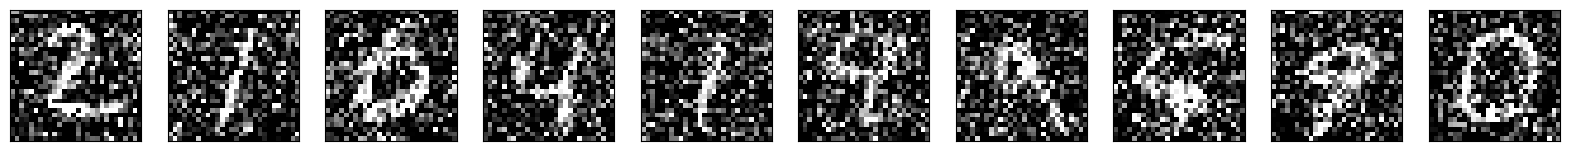

In [46]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [47]:
input_img = keras.Input(shape=(28, 28, 1))

# Write your encoder here

a = layers.Conv2D(16,(5,5),activation='relu',padding='same')(input_img)

a= layers.MaxPooling2D((2,2),padding='same')(a)

a = layers.Conv2D(16,(7,7),activation='relu',padding='same')(a)

a= layers.MaxPooling2D((2,2),padding='same')(a)

a = layers.Conv2D(8,(3,3),activation='relu',padding='same')(a)

a = layers.MaxPooling2D((2, 2), padding='same')(a)

a = layers.Conv2D(8,(5,5),activation='relu',padding='same')(a)

encoded = layers.MaxPooling2D((2, 2), padding='same')(a)

# Encoder output dimension is ## Mention the dimention ##

# Write your decoder here

a=layers.Conv2D(16,(3,3),activation='relu',padding='same')(encoded)

a=layers.UpSampling2D((2,2))(a)

a=layers.Conv2D(8,(7,7),activation='relu',padding='same')(a)

a=layers.UpSampling2D((2,2))(a)

a=layers.Conv2D(16,(3,3),activation='relu',padding='same')(a)

a=layers.UpSampling2D((2,2))(a)

a=layers.Conv2D(8,(5,5),activation='relu',padding='same')(a)

a=layers.UpSampling2D((2,2))(a)

a=layers.Conv2D(8,(5,5),activation='relu')(a)

decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(a)

autoencoder = keras.Model(input_img, decoded)

In [48]:
autoencoder.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_38 (Conv2D)          (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 14, 14, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_39 (Conv2D)          (None, 14, 14, 16)        12560     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 7, 7, 16)          0         
 ng2D)                                                           
                                                                 
 conv2d_40 (Conv2D)          (None, 7, 7, 8)           1160

In [49]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [50]:
autoencoder.fit(x_train_noisy, x_train_scaled,
                epochs=2,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_scaled))

Epoch 1/2
469/469 [==============================] - 68s 139ms/step - loss: 0.2544 - val_loss: 0.2093
Epoch 2/2
469/469 [==============================] - 70s 148ms/step - loss: 0.1843 - val_loss: 0.1663


In [51]:
decoded_imgs = autoencoder.predict(x_test_noisy)

313/313 [==============================] - 5s 14ms/step


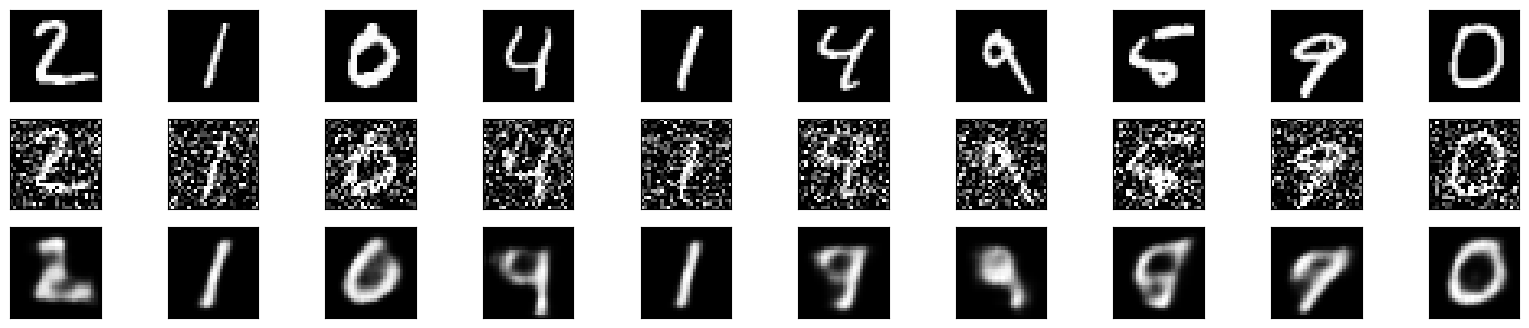

In [52]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test_scaled[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display noisy
    ax = plt.subplot(3, n, i+n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)    

    # Display reconstruction
    ax = plt.subplot(3, n, i + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()